In [3]:
import numpy as np
from sklearn.datasets import load_boston
import sys
sys.path.append('../algorithms')
from LinearModels.lasso_regression import LassoRegression
sys.path.append('..')
from utils import standardize

In [4]:
boston = load_boston()

In [5]:
X = boston.data
y = boston.target

In [38]:
X = standardize(X)

In [7]:
import matplotlib.pyplot as plt

The following chart shows the path of the covariates with differing sizes of alpha.

(0.004466835921509635,
 223872.11385683378,
 -4.080743130852215,
 3.3367201877587926)

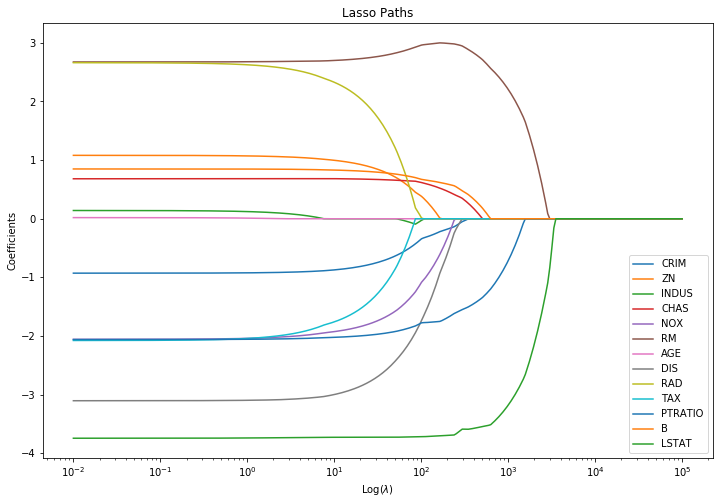

In [8]:
# Initialize variables
theta_list = []
lamda      = np.logspace(-2,5,300) #Range of lambda values

#Run lasso regression for each lambda
for l in lamda:
     lasso = LassoRegression(alpha=l, n_iter=100)
     lasso.fit(X, y)
     theta_list.append(lasso.coef_)

#Stack into numpy array
theta_lasso = np.stack(theta_list).T

#Plot results
n,_ = theta_lasso.shape
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(lamda, theta_lasso[i], label = boston.feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths')
plt.legend()
plt.axis('tight')